In [113]:
# Exercise 7-7
rm(list=ls())
library(ISLR)
library(sqldf)
library(splines)
library(boot)

In [114]:
##################################################################################
#  Explore the relationships between some of these other predictors and wage.    #
##################################################################################
attach(Wage)
summary(Wage)

The following objects are masked from Wage (pos = 3):

    age, education, health, health_ins, jobclass, logwage, maritl,
    race, region, wage, year


The following objects are masked from Wage (pos = 4):

    age, education, health, health_ins, jobclass, logwage, maritl,
    race, region, wage, year


The following objects are masked from Wage (pos = 6):

    age, education, health, health_ins, jobclass, logwage, maritl,
    race, region, wage, year


The following objects are masked from Wage (pos = 8):

    age, education, health, health_ins, jobclass, logwage, maritl,
    race, region, wage, year




      year           age                     maritl           race     
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                  
 Max.   :2009   Max.   :80.00                                          
                                                                       
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atla

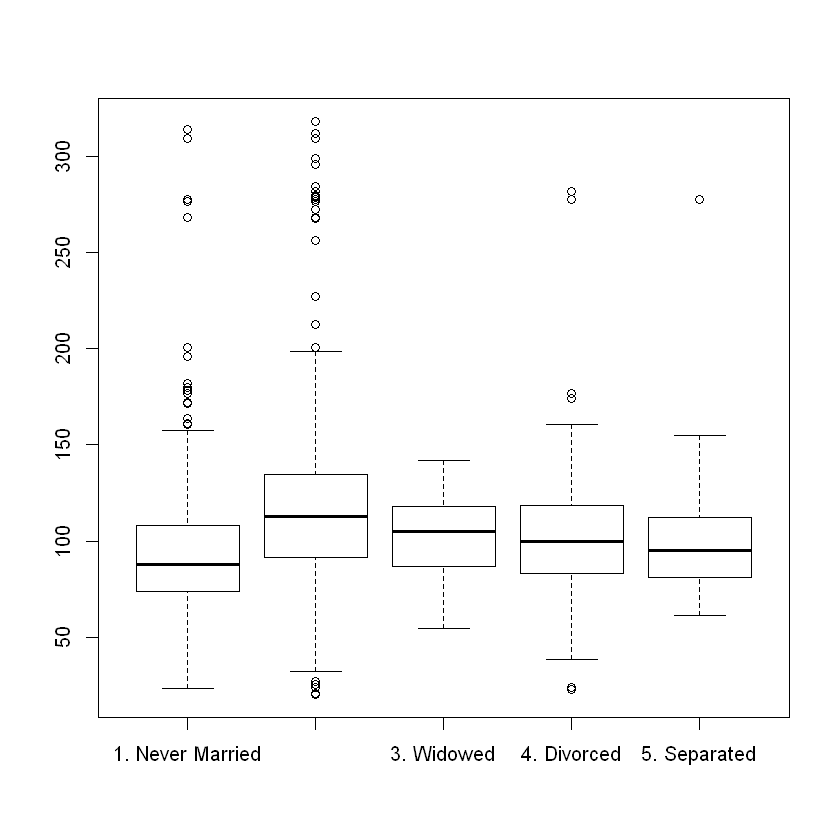

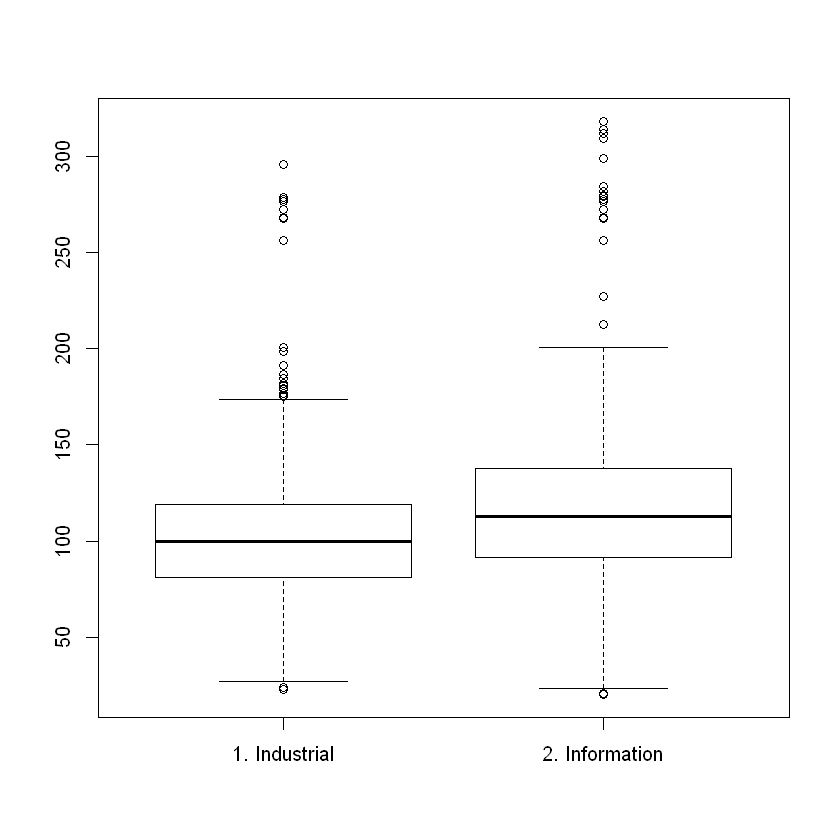

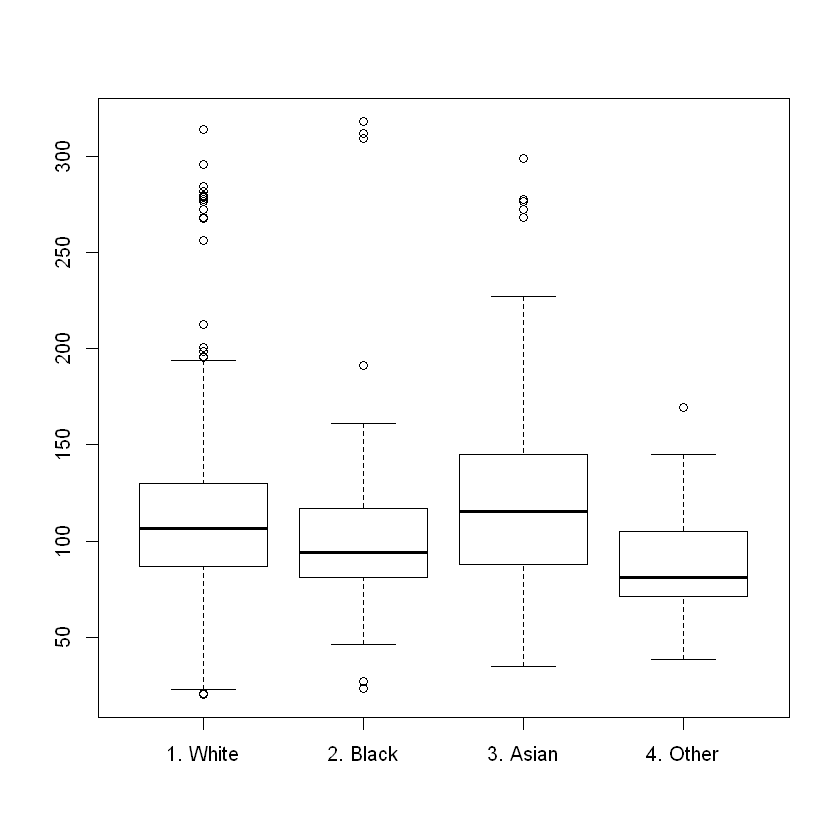

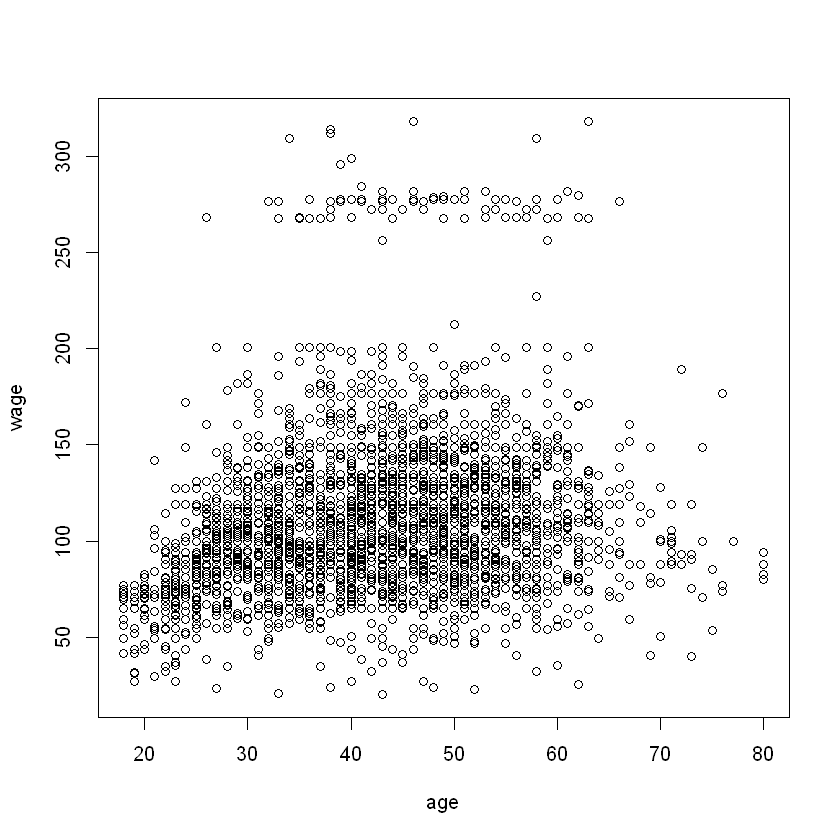

In [115]:
# I choose to explore the relationships between wage and each of maritl, jobclass, age, and race.
# Visualize one-way cuts:
# par(mfrow=c(2,2))
plot(maritl, wage)
plot(jobclass, wage)
plot(race, wage)
plot(age, wage)

In [116]:
# Let's create averages:
q1 <- sqldf("select jobclass, sum(wage)/count(wage) as avgwage from Wage group by jobclass")
print(q1)
# Clearly Info has 20% higher wage than Industrial, as seen in the above box-and-whiskers plot.

        jobclass  avgwage
1  1. Industrial 103.3211
2 2. Information 120.5927


In [117]:
q2 <- sqldf("select maritl, sum(wage)/count(wage) as avgwage from Wage group by maritl")
print(q2)
# In desc order Married, Divorced, Separated, Widowed, Never Married.

            maritl   avgwage
1 1. Never Married  92.73465
2       2. Married 118.86026
3       3. Widowed  99.53866
4      4. Divorced 103.15926
5     5. Separated 101.21579


In [118]:
q3 <- sqldf("select race, sum(wage)/count(wage) as avgwage from Wage group by race")
print(q3)
# In desc order Asian, White, Black, Other.

      race   avgwage
1 1. White 112.56367
2 2. Black 101.60118
3 3. Asian 120.28829
4 4. Other  89.97333


In [119]:
##################################################################################
#  Use non-linear fitting techniques to fit flexible models to the data.         #
##################################################################################

In [120]:
gam1 <- glm(wage~ns(age,2), data=Wage)
summary(gam1)


Call:
glm(formula = wage ~ ns(age, 2), data = Wage)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-99.76  -24.25   -5.03   15.24  206.45  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   70.683      2.634  26.837  < 2e-16 ***
ns(age, 2)1   84.476      5.286  15.983  < 2e-16 ***
ns(age, 2)2  -16.569      5.443  -3.044  0.00236 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1600.698)

    Null deviance: 5222086  on 2999  degrees of freedom
Residual deviance: 4797291  on 2997  degrees of freedom
AIC: 30653

Number of Fisher Scoring iterations: 2


In [121]:
gam2 <- glm(wage~ns(age,2)+maritl, data=Wage)
summary(gam2)


Call:
glm(formula = wage ~ ns(age, 2) + maritl, data = Wage)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-103.066   -23.773    -4.675    15.176   210.483  

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          69.295      2.605  26.602  < 2e-16 ***
ns(age, 2)1          65.750      6.140  10.709  < 2e-16 ***
ns(age, 2)2         -16.394      5.391  -3.041  0.00238 ** 
maritl2. Married     14.794      2.075   7.128 1.27e-12 ***
maritl3. Widowed     -3.097      9.277  -0.334  0.73855    
maritl4. Divorced    -2.160      3.401  -0.635  0.52554    
maritl5. Separated   -2.748      5.640  -0.487  0.62615    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1557.823)

    Null deviance: 5222086  on 2999  degrees of freedom
Residual deviance: 4662563  on 2993  degrees of freedom
AIC: 30576

Number of Fisher Scoring iterations: 2


In [122]:
gam3 <- glm(wage~ns(age,2)+race, data=Wage)
summary(gam3)


Call:
glm(formula = wage ~ ns(age, 2) + race, data = Wage)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-100.200   -24.030    -4.768    15.635   215.140  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    71.968      2.659  27.064  < 2e-16 ***
ns(age, 2)1    83.611      5.267  15.874  < 2e-16 ***
ns(age, 2)2   -14.898      5.433  -2.742  0.00614 ** 
race2. Black   -9.828      2.467  -3.984 6.92e-05 ***
race3. Asian    8.108      2.997   2.705  0.00687 ** 
race4. Other  -17.566      6.603  -2.660  0.00785 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1585.369)

    Null deviance: 5222086  on 2999  degrees of freedom
Residual deviance: 4746596  on 2994  degrees of freedom
AIC: 30627

Number of Fisher Scoring iterations: 2


In [123]:
gam4 <- glm(wage~ns(age,2)+jobclass, data=Wage)
summary(gam4)


Call:
glm(formula = wage ~ ns(age, 2) + jobclass, data = Wage)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-107.345   -23.691    -4.625    15.714   199.348  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              65.503      2.632  24.889  < 2e-16 ***
ns(age, 2)1              79.203      5.214  15.192  < 2e-16 ***
ns(age, 2)2             -17.891      5.346  -3.346 0.000829 ***
jobclass2. Information   15.295      1.442  10.607  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1543.28)

    Null deviance: 5222086  on 2999  degrees of freedom
Residual deviance: 4623666  on 2996  degrees of freedom
AIC: 30545

Number of Fisher Scoring iterations: 2


In [124]:
anova(gam1, gam2)

,Resid. Df,Resid. Dev,Df,Deviance
,<dbl>,<dbl>,<dbl>,<dbl>
1,2997,4797291,NA,NA
2,2993,4662563,4,134728.4


In [125]:
anova(gam1, gam3)

,Resid. Df,Resid. Dev,Df,Deviance
,<dbl>,<dbl>,<dbl>,<dbl>
1,2997,4797291,NA,NA
2,2994,4746596,3,50695.71


In [126]:
anova(gam1, gam4)

,Resid. Df,Resid. Dev,Df,Deviance
,<dbl>,<dbl>,<dbl>,<dbl>
1,2997,4797291,NA,NA
2,2996,4623666,1,173625


In [127]:
# Clearly gam4 is the best incremental improvement, since it has the lowest p-value in the GAM as well as the lowest p-value
# in the anova test.  Let's add on from there:

In [128]:
gam5 <- glm(wage~ns(age,2)+jobclass+maritl, data=Wage)
summary(gam5)


Call:
glm(formula = wage ~ ns(age, 2) + jobclass + maritl, data = Wage)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-110.716   -23.139    -4.715    15.543   202.397  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              64.054      2.601  24.624  < 2e-16 ***
ns(age, 2)1              59.896      6.049   9.903  < 2e-16 ***
ns(age, 2)2             -17.865      5.292  -3.376 0.000745 ***
jobclass2. Information   15.383      1.422  10.817  < 2e-16 ***
maritl2. Married         15.111      2.037   7.420 1.52e-13 ***
maritl3. Widowed         -0.628      9.105  -0.069 0.945019    
maritl4. Divorced        -1.659      3.338  -0.497 0.619101    
maritl5. Separated       -2.967      5.534  -0.536 0.591868    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1499.695)

    Null deviance: 5222086  on 2999  degrees of freedom
Residual deviance: 4487

In [129]:
gam6 <- glm(wage~ns(age,2)+jobclass+race, data=Wage)
summary(gam6)


Call:
glm(formula = wage ~ ns(age, 2) + jobclass + race, data = Wage)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-108.307   -23.712    -4.571    16.132   209.833  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              67.017      2.647  25.322  < 2e-16 ***
ns(age, 2)1              78.104      5.190  15.050  < 2e-16 ***
ns(age, 2)2             -15.882      5.329  -2.981  0.00290 ** 
jobclass2. Information   15.791      1.440  10.963  < 2e-16 ***
race2. Black            -12.292      2.429  -5.060 4.45e-07 ***
race3. Asian              6.785      2.942   2.306  0.02116 *  
race4. Other            -16.963      6.475  -2.620  0.00885 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1524.672)

    Null deviance: 5222086  on 2999  degrees of freedom
Residual deviance: 4563344  on 2993  degrees of freedom
AIC: 30511

Number of Fisher Scor

In [130]:
anova(gam4, gam5)

,Resid. Df,Resid. Dev,Df,Deviance
,<dbl>,<dbl>,<dbl>,<dbl>
1,2996,4623666,NA,NA
2,2992,4487089,4,136577.5


In [131]:
anova(gam4, gam6)

,Resid. Df,Resid. Dev,Df,Deviance
,<dbl>,<dbl>,<dbl>,<dbl>
1,2996,4623666,NA,NA
2,2993,4563344,3,60322.02


In [132]:
# Conflicting indication, as model with race has lower p-values yet the model with maritl has the lower anova p-value.
# Let's try the full model now:

In [133]:
gam7 <- glm(wage~ns(age,2)+jobclass+race+maritl, data=Wage)
summary(gam7)


Call:
glm(formula = wage ~ ns(age, 2) + jobclass + race + maritl, data = Wage)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-111.334   -23.140    -4.637    15.315   210.893  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             65.4584     2.6220  24.965  < 2e-16 ***
ns(age, 2)1             60.2570     6.0306   9.992  < 2e-16 ***
ns(age, 2)2            -16.2209     5.2848  -3.069  0.00216 ** 
jobclass2. Information  15.7816     1.4230  11.090  < 2e-16 ***
race2. Black           -10.1290     2.4164  -4.192 2.85e-05 ***
race3. Asian             5.4679     2.9128   1.877  0.06058 .  
race4. Other           -16.1756     6.3993  -2.528  0.01153 *  
maritl2. Married        14.1068     2.0390   6.918 5.56e-12 ***
maritl3. Widowed         0.0891     9.0730   0.010  0.99217    
maritl4. Divorced       -1.9591     3.3303  -0.588  0.55640    
maritl5. Separated      -2.4037     5.5133  -0.436  0.66288    
---
Signif. c

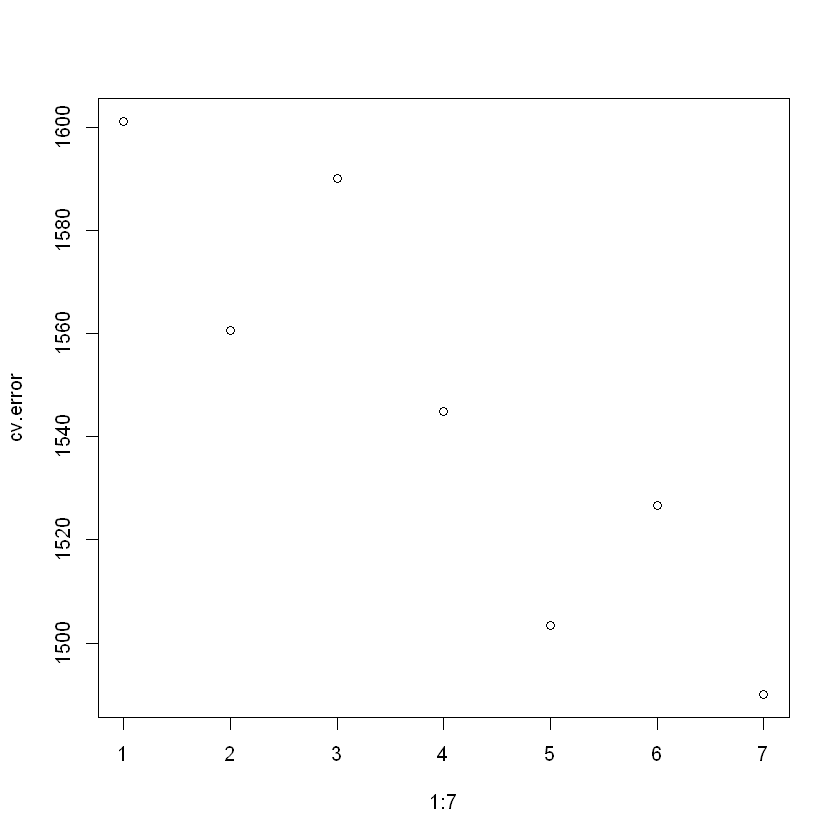

In [138]:
# Let's test them all via cross-validation.  Create vector to hold results:
cv.error <- rep(0, 7)
# Set seed and CV:
set.seed(1)
cv.error[1] <- cv.glm(data=Wage, glmfit=gam1, K=10)$delta[1]
cv.error[2] <- cv.glm(data=Wage, glmfit=gam2, K=10)$delta[1]
cv.error[3] <- cv.glm(data=Wage, glmfit=gam3, K=10)$delta[1]
cv.error[4] <- cv.glm(data=Wage, glmfit=gam4, K=10)$delta[1]
cv.error[5] <- cv.glm(data=Wage, glmfit=gam5, K=10)$delta[1]
cv.error[6] <- cv.glm(data=Wage, glmfit=gam6, K=10)$delta[1]
cv.error[7] <- cv.glm(data=Wage, glmfit=gam7, K=10)$delta[1]
plot(1:7, cv.error)

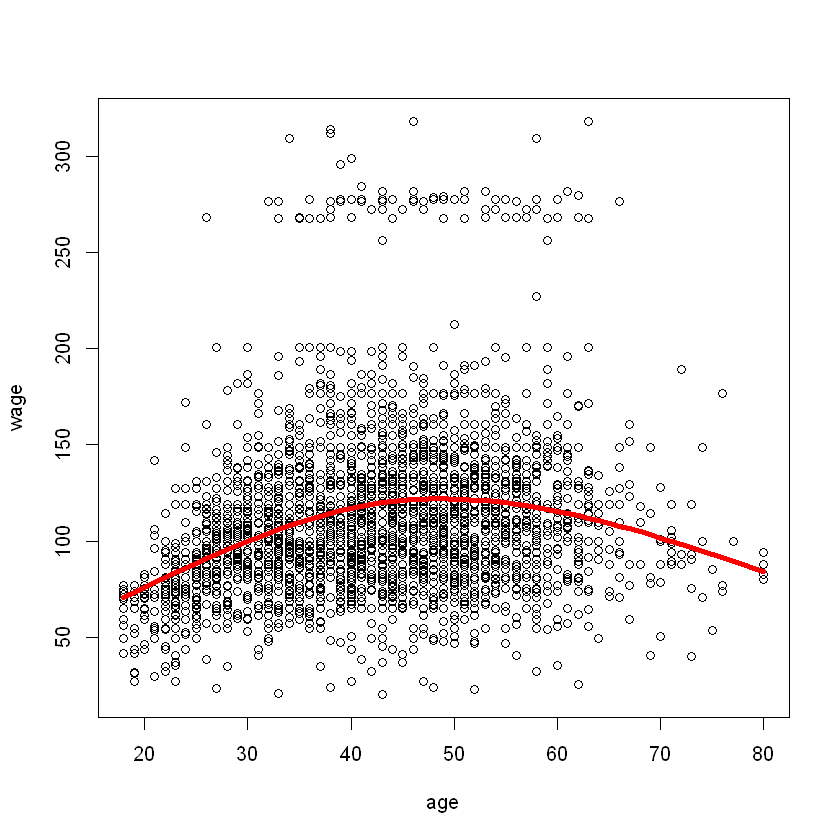

In [139]:
# As an additional diagnostic, let's plot wage against age, and overlay the predicted values of the natural spline:
agelims <- range(Wage$age)
age.grid <- seq(from=agelims[1], to=agelims[2])
preds <- predict(gam1, newdata=data.frame(age=age.grid))
plot(age, wage)
lines(age.grid, preds, lwd=4, col="red")

In [ ]:
# Summary: clearly the gam7 model: the one that included each of maritl, jobclass, race, and the normal spline of age
# produced the lowest CV error and is the recommended model.  This is intuitive in that each of the variables
# appeared to be predictive in their above box and whisker plots, however also slightly counterintuitive because 
# moving from gam6 to gam7 for instance was not fully indicated as only 1 of the 4 dummy variables had a t-stat 
# larger than 2.0.  Nonetheless, this shows the value in CV relative to simply looking at the t-stats and p-values.